<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/swell_cosseno_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

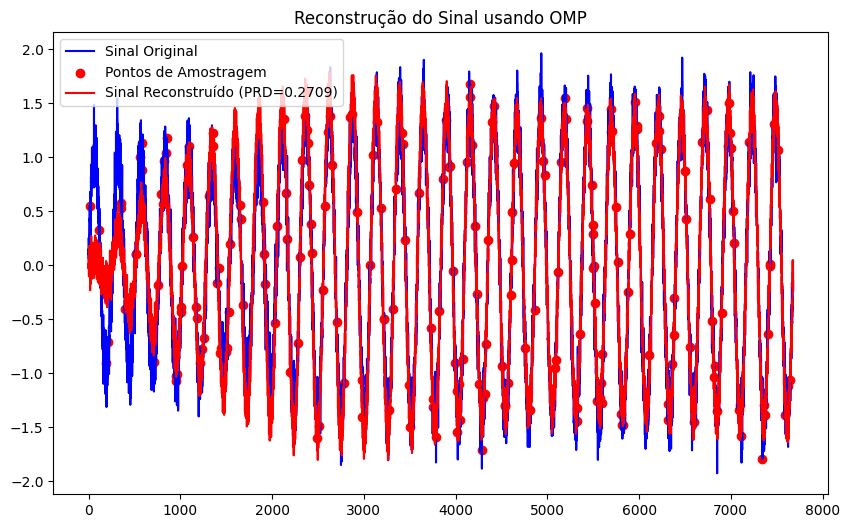

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from sklearn.linear_model import OrthogonalMatchingPursuit

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_prd(original, reconstructed):
   return  np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum((original) ** 2))


def evento_swell(SNRdb):
    Vm1 = 1
    fase = 0
    FreqFund = 60

    Npc = 256
    Nc = 30
    Npt = Nc * Npc
    Fs = Npc * 60
    T = 1 / Fs

    w0 = 2 * np.pi * FreqFund

    t = np.arange(0, T * Npt, T)

    no = np.random.randint(7 * Npc, 8 * Npc)
    n = no

    afundamento = np.random.uniform(0.1, 0.9)
    passo = afundamento / Npc

    Ps = (Vm1**2) / 2
    Pr = Ps / (10**(SNRdb / 10)) / 2  # Ajuste do cálculo do desvio padrão
    desvio = np.sqrt(Pr)
    R = np.random.normal(0, desvio, Nc * Npc)
    R = R - np.mean(R)

    x1 = np.zeros(Nc * Npc)

    for n1 in range(Nc * Npc):
        x1[n1] = Vm1 * np.sin(w0 * t[n1] + fase)
        if no < n1 < (no + Npc + 1):
            Vm1 = Vm1 + passo

    xIn = x1 + R

    return xIn, n, Nc, FreqFund

SNRdb = 10
xIn, n, Nc, FreqFund = evento_swell(SNRdb)


# Adiciona o mesmo ruído usado na função evento_capc1
noisy_signal = np.zeros(len(xIn))
noisy_signal[:len(xIn)] = xIn

# Amostragem aleatória do sinal ruidoso
p = 220
amostras_aleatorias = np.round((len(xIn)) * np.random.rand(p)).astype(int)
y = noisy_signal[amostras_aleatorias]






# Construção da matriz de observação Phi
Phi = scipy.fftpack.dct(np.eye(len(xIn)), axis=0, norm='ortho')
#CPhi = Phi[amostras_aleatorias, :]
# Construção da matriz de observação Phi
#Phi = np.random.randn(p, n)  # Matriz aleatória com dimensões p x n
#Phi /= np.linalg.norm(Phi, axis=0)  # Normalização das colunas para garantir Phi é unitário

CPhi = Phi[amostras_aleatorias, :]

s_reconstruido = omp(CPhi, y, 10)  # Use apenas as linhas relevantes de Phi
x_rec = np.dot(Phi.T, s_reconstruido)


#Phi = np.fft.fft(np.eye(n, n))
#CPhi = np.imag(Phi[amostras_aleatorias, :])
#CPhi = Phi[amostras_aleatorias,:]




s_reconstruido = omp(Phi[amostras_aleatorias, :], y, 10)  # Use apenas as linhas relevantes de Phi
x_rec = np.dot(Phi, s_reconstruido)
#x_rec = np.imag(np.fft.fft(s_reconstruido))

# Calcular o PRD
prd_omp = calculate_prd(xIn, x_rec)

# Visualizar o sinal original com pontos de amostragem aleatória e sinal reconstruído
plt.figure(figsize=(10, 6))
t = np.arange(0, len(xIn))
plt.plot(t, xIn, 'b', label='Sinal Original')
plt.scatter(amostras_aleatorias, xIn[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (PRD={prd_omp:.4f})')
plt.title('Reconstrução do Sinal usando OMP')
plt.legend()
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from sklearn.linear_model import OrthogonalMatchingPursuit

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

def evento_swell(SNRdb):
    Vm1 = 1
    fase = 0
    FreqFund = 60
    Npc = 256
    Nc = 30
    Npt = Nc * Npc
    Fs = Npc * 60
    T = 1 / Fs
    w0 = 2 * np.pi * FreqFund

    t = np.arange(0, T * Npt, T)

    no = np.random.randint(7 * Npc, 8 * Npc)
    n = no

    afundamento = np.random.uniform(0.1, 0.9)
    passo = afundamento / Npc

    Ps = (Vm1 ** 2) / 2
    Pr = Ps / (10 ** (SNRdb / 10)) / 2  # Ajuste do cálculo do desvio padrão
    desvio = np.sqrt(Pr)
    R = np.random.normal(0, desvio, Nc * Npc)
    R = R - np.mean(R)

    x1 = np.zeros(Nc * Npc)

    for n1 in range(Nc * Npc):
        x1[n1] = Vm1 * np.sin(w0 * t[n1] + fase)
        if no < n1 < (no + Npc + 1):
            Vm1 = Vm1 + passo

    xIn = x1 + R

    return xIn, n, Nc, FreqFund

# Configurações
SNRdb = 10

# Geração do sinal de afundamento de tensão
xIn, n, Nc, FreqFund = evento_swell(SNRdb)

# Adiciona o mesmo ruído usado na função evento_swell
noisy_signal = np.zeros(len(xIn))
noisy_signal[:len(xIn)] = xIn

# Amostragem aleatória do sinal ruidoso
p = 220
amostras_aleatorias = np.round((len(xIn)) * np.random.rand(p)).astype(int)
y = noisy_signal[amostras_aleatorias]

# Escolha da transformada: FFT ou DCT
usar_fft = True

if usar_fft:
    # Construção da matriz de observação Phi usando FFT
    Phi = np.fft.fft(np.eye(len(xIn), len(xIn)))
else:
    # Construção da matriz de observação Phi usando DCT
    Phi = scipy.fftpack.dct(np.eye(len(xIn)), axis=0, norm='ortho')

Phi /= np.linalg.norm(Phi, axis=0)  # Normalização das colunas para garantir Phi é unitário
CPhi = Phi[amostras_aleatorias, :]

# Reconstrução do sinal usando OMP
s_reconstruido = omp(CPhi, y, 10)  # Use apenas as linhas relevantes de Phi
x_rec = np.dot(Phi.T, s_reconstruido)

# Calcular o PRD
prd_omp = calculate_prd(xIn, x_rec)

# Visualizar o sinal original com pontos de amostragem aleatória e sinal reconstruído
plt.figure(figsize=(10, 6))
t = np.arange(0, len(xIn))
plt.plot(t, xIn, 'b', label='Sinal Original')
plt.scatter(amostras_aleatorias, xIn[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (PRD={prd_omp:.4f})')
plt.title('Reconstrução do Sinal usando OMP')
plt.legend()
plt.show()


ValueError: Complex data not supported
[[ 0.01141089+0.00000000e+00j  0.00872522-7.35382950e-03j
   0.00193243-1.12460684e-02j ... -0.00577   +9.84456426e-03j
   0.00193243+1.12460684e-02j  0.00872522+7.35382950e-03j]
 [ 0.01141089+0.00000000e+00j  0.01120772+2.14368877e-03j
   0.01060544+4.21104143e-03j ...  0.00962552-6.12844018e-03j
   0.01060544-4.21104143e-03j  0.01120772-2.14368877e-03j]
 [ 0.01141089+0.00000000e+00j -0.0114107 -6.53482113e-05j
   0.01141014+1.30694279e-04j ... -0.0114092 +1.96036061e-04j
   0.01141014-1.30694279e-04j -0.0114107 +6.53482113e-05j]
 ...
 [ 0.01141089+0.00000000e+00j -0.01072804+3.88812860e-03j
   0.00876122-7.31091124e-03j ... -0.00574582-9.85869630e-03j
   0.00876122+7.31091124e-03j -0.01072804-3.88812860e-03j]
 [ 0.01141089+0.00000000e+00j -0.01100498+3.01642787e-03j
   0.00981612-5.81825364e-03j ... -0.00792891-8.20614293e-03j
   0.00981612+5.81825364e-03j -0.01100498-3.01642787e-03j]
 [ 0.01141089+0.00000000e+00j -0.01112122-2.55476113e-03j
   0.01026693+4.97981636e-03j ... -0.00889138+7.15204501e-03j
   0.01026693-4.97981636e-03j -0.01112122+2.55476113e-03j]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from sklearn.linear_model import OrthogonalMatchingPursuit

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

def evento_swell(SNRdb):
    Vm1 = 1
    fase = 0
    FreqFund = 60
    Npc = 256
    Nc = 30
    Npt = Nc * Npc
    Fs = Npc * 60
    T = 1 / Fs
    w0 = 2 * np.pi * FreqFund

    t = np.arange(0, T * Npt, T)

    no = np.random.randint(7 * Npc, 8 * Npc)
    n = no

    afundamento = np.random.uniform(0.1, 0.9)
    passo = afundamento / Npc

    Ps = (Vm1 ** 2) / 2
    Pr = Ps / (10 ** (SNRdb / 10)) / 2  # Ajuste do cálculo do desvio padrão
    desvio = np.sqrt(Pr)
    R = np.random.normal(0, desvio, Nc * Npc)
    R = R - np.mean(R)

    x1 = np.zeros(Nc * Npc)

    for n1 in range(Nc * Npc):
        x1[n1] = Vm1 * np.sin(w0 * t[n1] + fase)
        if no < n1 < (no + Npc + 1):
            Vm1 = Vm1 + passo

    xIn = x1 + R

    return xIn, n, Nc, FreqFund

# Configurações
SNRdb = 10

# Geração do sinal de afundamento de tensão
xIn, n, Nc, FreqFund = evento_swell(SNRdb)

# Adiciona o mesmo ruído usado na função evento_swell
noisy_signal = np.zeros(len(xIn))
noisy_signal[:len(xIn)] = xIn

# Amostragem aleatória do sinal ruidoso
p = 220
amostras_aleatorias = np.round((len(xIn)) * np.random.rand(p)).astype(int)
y = noisy_signal[amostras_aleatorias]

# Escolha da transformada: FFT ou DCT
usar_fft = True

if usar_fft:
    # Construção da matriz de observação Phi usando FFT
    Phi = np.fft.fft(np.eye(len(xIn))) / np.sqrt(len(xIn))
else:
    # Construção da matriz de observação Phi usando DCT
    Phi = scipy.fftpack.dct(np.eye(len(xIn)), axis=0, norm='ortho')

Phi /= np.linalg.norm(Phi, axis=0)  # Normalização das colunas para garantir Phi é unitário
CPhi = Phi[amostras_aleatorias, :]

# Reconstrução do sinal usando OMP
s_reconstruido = omp(CPhi, y, 10)  # Use apenas as linhas relevantes de Phi
x_rec = np.dot(Phi.T, s_reconstruido)

# Calcular o PRD
prd_omp = calculate_prd(xIn, x_rec)

# Visualizar o sinal original com pontos de amostragem aleatória e sinal reconstruído
plt.figure(figsize=(10, 6))
t = np.arange(0, len(xIn))
plt.plot(t, xIn, 'b', label='Sinal Original')
plt.scatter(amostras_aleatorias, xIn[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (PRD={prd_omp:.4f})')
plt.title('Reconstrução do Sinal usando OMP')
plt.legend()
plt.show()


ValueError: Complex data not supported
[[ 1.14108866e-02+0.j          5.32133453e-03-0.01009414j
  -6.44780143e-03-0.00941457j ... -1.13350492e-02-0.00131339j
  -6.44780143e-03+0.00941457j  5.32133453e-03+0.01009414j]
 [ 1.14108866e-02+0.j         -1.04915786e-02-0.00448722j
   7.88178086e-03+0.00825142j ... -4.00200567e-03+0.01068608j
   7.88178086e-03-0.00825142j -1.04915786e-02+0.00448722j]
 [ 1.14108866e-02+0.j         -7.60758210e-03-0.00850488j
  -1.26701132e-03+0.01134033j ...  9.29700255e-03+0.0066162j
  -1.26701132e-03-0.01134033j -7.60758210e-03+0.00850488j]
 ...
 [ 1.14108866e-02+0.j          1.53568521e-03-0.01130708j
  -1.09975394e-02-0.00304343j ... -4.49579850e-03-0.0104879j
  -1.09975394e-02+0.00304343j  1.53568521e-03+0.01130708j]
 [ 1.14108866e-02+0.j         -7.08638356e-03+0.0089438j
  -2.60932129e-03-0.01110855j ...  1.03272626e-02-0.00485345j
  -2.60932129e-03+0.01110855j -7.08638356e-03-0.0089438j ]
 [ 1.14108866e-02+0.j          8.08190690e-03+0.0080555j
   3.73419725e-05+0.01141083j ... -8.02901104e-03-0.00810823j
   3.73419725e-05-0.01141083j  8.08190690e-03-0.0080555j ]]


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import scipy.fftpack

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

def evento_swell(SNRdb):
    Vm1 = 1
    fase = 0
    FreqFund = 60

    Npc = 256
    Nc = 30
    Npt = Nc * Npc
    Fs = Npc * 60
    T = 1 / Fs

    w0 = 2 * np.pi * FreqFund

    t = np.arange(0, T * Npt, T)

    no = np.random.randint(7 * Npc, 8 * Npc)
    n = no

    afundamento = np.random.uniform(0.1, 0.9)
    passo = afundamento / Npc

    Ps = (Vm1**2) / 2
    Pr = Ps / (10**(SNRdb / 10)) / 2  # Ajuste do cálculo do desvio padrão
    desvio = np.sqrt(Pr)
    R = np.random.normal(0, desvio, Nc * Npc)
    R = R - np.mean(R)

    x1 = np.zeros(Nc * Npc)

    for n1 in range(Nc * Npc):
        x1[n1] = Vm1 * np.sin(w0 * t[n1] + fase)
        if no < n1 < (no + Npc + 1):
            Vm1 = Vm1 + passo

    xIn = x1 + R

    return xIn, n, Nc, FreqFund

# Configurações
SNRdb = 10
xIn, n, Nc, FreqFund = evento_swell(SNRdb)

# Adiciona o mesmo ruído usado na função evento_capc1
noisy_signal = np.zeros(len(xIn))
noisy_signal[:len(xIn)] = xIn

# Amostragem aleatória do sinal ruidoso
p = 220
amostras_aleatorias = np.round((len(xIn)) * np.random.rand(p)).astype(int)
y = noisy_signal[amostras_aleatorias]

# Escolha da transformada: FFT ou DCT
usar_fft = True

if usar_fft:
    # Construção da matriz de observação Phi usando FFT
    Phi = np.fft.fft(np.eye(n, n))
else:
    # Construção da matriz de observação Phi usando DCT
    Phi = scipy.fftpack.dct(np.eye(n), axis=0, norm='ortho')

# Selecionar apenas as linhas relevantes de Phi para as amostras aleatórias
if usar_fft:
  CPhi = np.imag(Phi[amostras_aleatorias])
else:
  CPhi = Phi[amostras_aleatorias, :]


# OMP para minimização de l1
s_reconstruido = omp(CPhi, y, 10)

# Reconstruir o sinal
if usar_fft:
  x_rec = np.imag(np.fft.fft(s_reconstruido))
else:
    x_rec = np.dot(Phi.T, s_reconstruido)

# Calcular o PRD
prd_omp = calculate_prd(xIn, x_rec)

# Visualizar o sinal original com pontos de amostragem aleatória e sinal reconstruído
plt.figure(figsize=(10, 6))
t = np.arange(0, len(xIn))
plt.plot(t, xIn, 'b', label='Sinal Original')
plt.scatter(amostras_aleatorias, xIn[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (PRD={prd_omp:.4f})')
plt.title('Reconstrução do Sinal usando OMP')
plt.legend()
plt.show()


IndexError: index 6941 is out of bounds for axis 0 with size 1915